In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/a.namazov/.jupyter/players_21.csv")
data.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000,560000,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.com/players/158/023/21_120.png,https://cdn.sofifa.com/teams/241/60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/1369/60.png,https://cdn.sofifa.com/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000,220000,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.com/players/020/801/21_120.png,https://cdn.sofifa.com/teams/45/60.png,https://cdn.sofifa.com/flags/it.png,https://cdn.sofifa.com/teams/1354/60.png,https://cdn.sofifa.com/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000,240000,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.com/players/188/545/21_120.png,https://cdn.sofifa.com/teams/21/60.png,https://cdn.sofifa.com/flags/de.png,NaN,https://cdn.sofifa.com/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000,270000,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.com/players/190/871/21_120.png,https://cdn.sofifa.com/teams/73/60.png,https://cdn.sofifa.com/flags/fr.png,NaN,https://cdn.sofifa.com/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000,370000,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.com/players/192/985/21_120.png,https://cdn.sofifa.com/teams/10/60.png,https://cdn.sofifa.com/flags/gb-eng.png,https://cdn.sofifa.com/teams/1325/60.png,https://cdn.sofifa.com/flags/be.png


In [9]:
# number of rows and columns of dataset
data.shape

(18949, 107)

In [12]:
# data with null value
data.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url         225
club_flag_url         225
nation_logo_url     17822
nation_flag_url         0
Length: 107, dtype: int64

In [13]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18949 entries, 0 to 18948
Columns: 107 entries, sofifa_id to nation_flag_url
dtypes: float64(12), int64(45), object(50)
memory usage: 15.5+ MB


In [20]:
# Number of players of each team
data_sum_of_plrs = data.groupby("club_name", as_index=False)[["short_name"]].count().sort_values(by="short_name", ascending=False)
data_sum_of_plrs

,club_name,short_name
407,Manchester City,33
334,Hellas Verona,33
573,Southampton,33
62,Atalanta,33
194,Crotone,33
...,...,...
74,Bahia,20
405,Macarthur FC,20
98,Brisbane Roar,19
129,Central Coast Mariners,18


In [21]:
# number of players per team
data_sum_of_plrs.mean()

short_name    27.49486
dtype: float64

In [24]:
# Extracting Base Positions of Players from player_position column
data.player_positions = data.player_positions.str.strip()
data["base_position"] = data.player_positions.str.extract('(\w*)')
data

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,base_position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000,560000,33,...,52+3,52+3,62+3,19+3,https://cdn.sofifa.com/players/158/023/21_120.png,https://cdn.sofifa.com/teams/241/60.png,https://cdn.sofifa.com/flags/es.png,https://cdn.sofifa.com/teams/1369/60.png,https://cdn.sofifa.com/flags/ar.png,RW
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000,220000,35,...,54+3,54+3,61+3,20+3,https://cdn.sofifa.com/players/020/801/21_120.png,https://cdn.sofifa.com/teams/45/60.png,https://cdn.sofifa.com/flags/it.png,https://cdn.sofifa.com/teams/1354/60.png,https://cdn.sofifa.com/flags/pt.png,ST
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000,240000,31,...,60+3,60+3,61+3,19+3,https://cdn.sofifa.com/players/188/545/21_120.png,https://cdn.sofifa.com/teams/21/60.png,https://cdn.sofifa.com/flags/de.png,NaN,https://cdn.sofifa.com/flags/pl.png,ST
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000,270000,28,...,49+3,49+3,62+3,20+3,https://cdn.sofifa.com/players/190/871/21_120.png,https://cdn.sofifa.com/teams/73/60.png,https://cdn.sofifa.com/flags/fr.png,NaN,https://cdn.sofifa.com/flags/br.png,LW
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000,370000,29,...,69+3,69+3,75+3,21+3,https://cdn.sofifa.com/players/192/985/21_120.png,https://cdn.sofifa.com/teams/10/60.png,https://cdn.sofifa.com/flags/gb-eng.png,https://cdn.sofifa.com/teams/1325/60.png,https://cdn.sofifa.com/flags/be.png,CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18944,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000,1000,21,...,47+2,47+2,45+2,15+2,https://cdn.sofifa.com/players/257/710/21_120.png,https://cdn.sofifa.com/teams/112165/60.png,https://cdn.sofifa.com/flags/cn.png,NaN,https://cdn.sofifa.com/flags/cn.png,CB
18945,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000,1000,21,...,46+2,46+2,47+2,15+2,https://cdn.sofifa.com/players/257/933/21_120.png,https://cdn.sofifa.com/teams/112540/60.png,https://cdn.sofifa.com/flags/cn.png,NaN,https://cdn.sofifa.com/flags/cn.png,CM
18946,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000,2000,28,...,46+1,46+1,47,11+2,https://cdn.sofifa.com/players/257/936/21_120.png,https://cdn.sofifa.com/teams/111774/60.png,https://cdn.sofifa.com/flags/cn.png,NaN,https://cdn.sofifa.com/flags/cn.png,CM
18947,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000,500,17,...,26+2,26+2,33+2,14+2,https://cdn.sofifa.com/players/258/736/21_120.png,https://cdn.sofifa.com/teams/1920/60.png,https://cdn.sofifa.com/flags/gb-eng.png,NaN,https://cdn.sofifa.com/flags/gb-eng.png,ST


In [25]:
#
data["base_position"].value_counts()

CB     3252
ST     2647
CM     2242
GK     2084
CDM    1514
LB     1403
RB     1363
CAM    1148
LM     1069
RM     1066
RW      438
LW      420
CF      115
LWB     100
RWB      88
Name: base_position, dtype: int64

In [26]:
# top fastest players
p_name = data[["movement_acceleration","short_name", "player_positions", "age", "nationality", "movement_sprint_speed"]].nlargest(7,['movement_acceleration']).set_index('short_name')
p_name

,movement_acceleration,player_positions,age,nationality,movement_sprint_speed
short_name,,,,,
Adama Traoré,97,"RW, RWB",24,Spain,96
K. Mbappé,96,"ST, LW, RW",21,France,96
R. Sterling,96,"LW, RW",25,England,90
A. Davies,96,"LB, LM, RM",19,Canada,96
M. Diaby,96,LM,20,France,90
D. James,96,"RM, LM",22,Wales,95
J. Doku,96,"RW, LW",18,Belgium,91


In [29]:
# most paid players
mp_name = data[["wage_eur","long_name"]].nlargest(7,['wage_eur']).set_index('long_name')
mp_name

,wage_eur
long_name,
Lionel Andrés Messi Cuccittini,560000
Kevin De Bruyne,370000
Karim Benzema,350000
Eden Hazard,350000
Carlos Henrique Venancio Casimiro,310000
Toni Kroos,310000
Sergio Leonel Agüero del Castillo,300000


<function matplotlib.pyplot.show(close=None, block=None)>

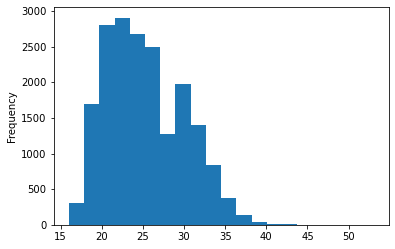

In [34]:
# age of players in histogram
data['age'].plot(kind="hist", bins=20)
plt.show

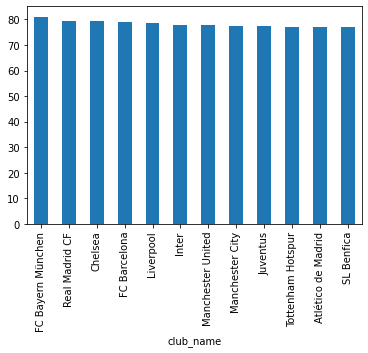

In [37]:
top_teams = data.groupby('club_name')['overall'].mean().sort_values(ascending=False)[:12]
top_teams.plot(kind='bar')
plt.show()

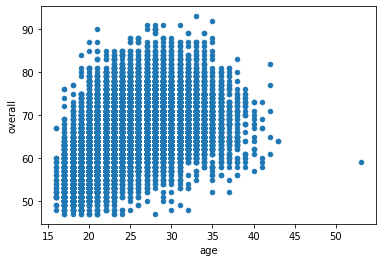

In [38]:
# age and overall
data.plot.scatter(x='age', y='overall')
plt.show()

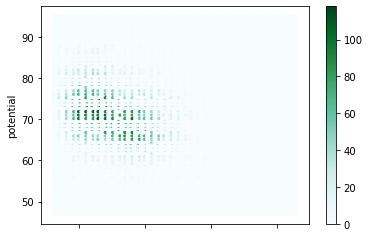

In [39]:
# age and potential
df.plot.hexbin(x='age', y='potential')
plt.show()